Notebooks with simulations for the proposed methods.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error

# custom libs
import sys
sys.path.append("..")
from src.simulations import simulate_curves
from src.dynamicFPC import K_dFPC, W_dFPC
from src.plotting import set_plotting_configs

set_plotting_configs()

c:\Users\mathe\Projetos\densities4risk\notebooks\..\src\dynamicFPC.py:653: SyntaxWarning: invalid escape sequence '\h'
  plt.title("Wavelet-based decomposition: $\hat{h}$")
c:\Users\mathe\Projetos\densities4risk\notebooks\..\src\dynamicFPC.py:671: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(self.scores[i, :], label=f"$\eta_{i}$")
c:\Users\mathe\Projetos\densities4risk\notebooks\..\src\dynamicFPC.py:674: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(self.scores[i, :], label=f"$\eta_{i}$", alpha=alpha_)
c:\Users\mathe\Projetos\densities4risk\notebooks\..\src\dynamicFPC.py:677: SyntaxWarning: invalid escape sequence '\e'
  plt.title("Wavelet-based decomposition: $\eta{h}$")


# NR = 1

In [20]:
# Configurações iniciais

n = 100          # sample size (curves)
d = 2            # dimension parameter
nt = 256         # number of grid points
u = np.linspace(0.01, 0.99, nt)[:, None]  # nt x 1 grid
phis = [-0.775, 0.65, -0.525, 0.4] # AR(1) model coefficients
variance = 0.5

Y, X, mEps = simulate_curves(
                        n,
                        nt,
                        u,
                        phis, 
                        variances=np.full(len(phis), variance)
                        )

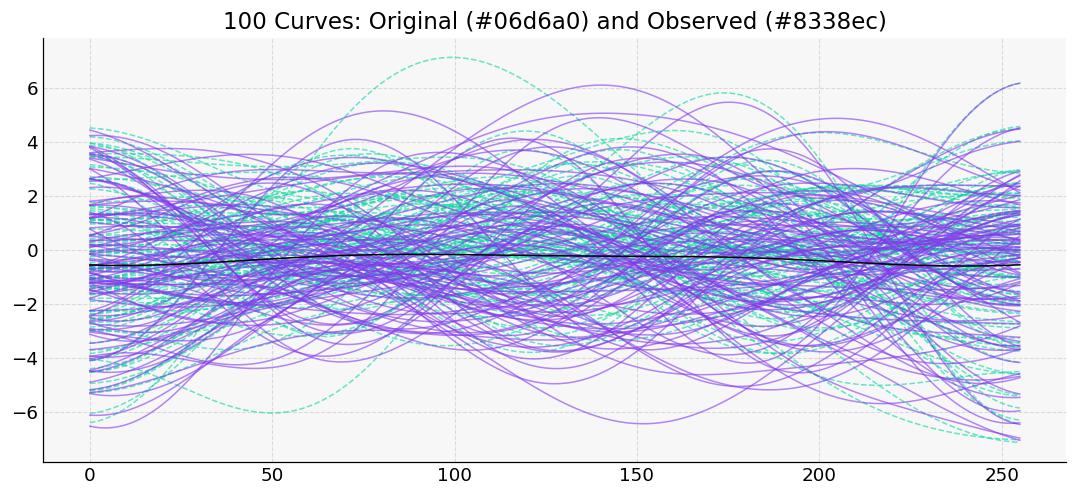

In [21]:

color_original = "#06d6a0"
plt.plot(X, alpha=.6, c=color_original, linestyle="--",label="Unobserved")

color_observed = "#8338ec"
plt.plot(Y, alpha=.6, c=color_observed, label="Observed")

plt.plot(np.mean(Y,axis=1), c="black")

plt.title(f"{n} Curves: Original ({color_original}) and Observed ({color_observed})")

plt.show()


## W-dFPC

In [61]:
wavelet = 'db2'
N = 3 # wavelet decomposition level
p = 5 # lags
dimensions = 10

WdFPC_model = W_dFPC(Y)
WdFPC_model.fit(
    nt=nt,
    N=N,
    wavelet=wavelet,
    p=p,
    d=dimensions)

c:\Users\user\Projetos\densities4risk\notebooks\..\src\libs\dynamicFPC.py:612: ComplexWarning: Casting complex values to real discards the imaginary part
  coeffs_m = vec2coeffs(B[:, m], sizes)
c:\Users\user\Projetos\densities4risk\notebooks\..\src\libs\dynamicFPC.py:620: ComplexWarning: Casting complex values to real discards the imaginary part
  for t in range(n):


In [62]:
WdFPC_fitted = WdFPC_model.Yhat

## K-dFPC

In [63]:
m=nt
lag_maximum = 5
du=0.05
p=5
dimensions = 10
u = u

KdFPC_model = K_dFPC(Y)
KdFPC_model.fit(
    lag_max=lag_maximum,
    alpha=0.10,
    du=0.05,
    B=1000,
    p=5,
    m=nt,
    u=u,
    select_ncomp=False,
    dimension=dimensions
)

In [64]:
KdFPC_fitted = KdFPC_model.fitted_values

## Result for specific curve

In [65]:
t = 0

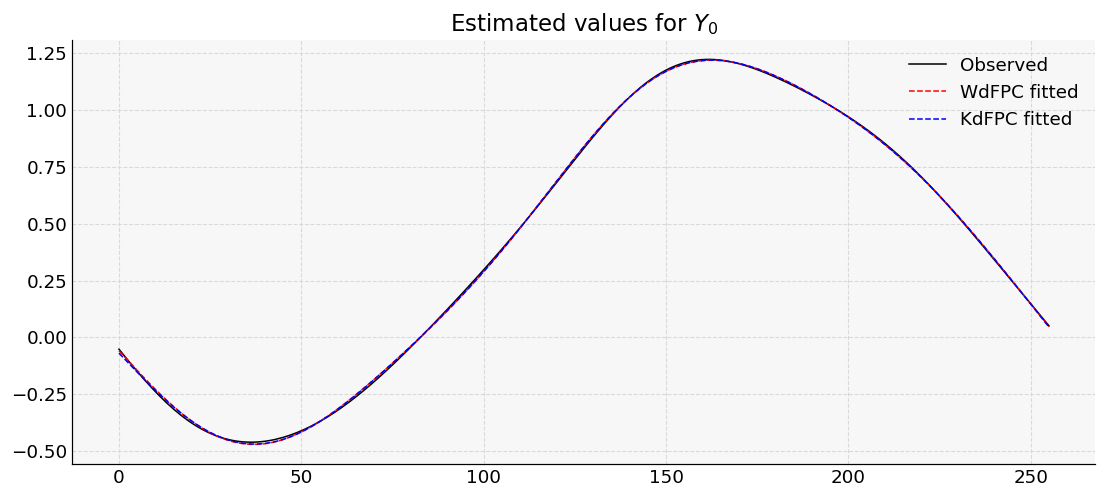

In [66]:
plt.figure()

plt.plot(Y[:, t], label="Observed", c="black")
plt.plot(WdFPC_fitted[:, t], label="WdFPC fitted", c="red", linestyle="--")
plt.plot(KdFPC_fitted[:, t], label="KdFPC fitted", c="blue", linestyle="--")

plt.legend()
plt.title(f"Estimated values for $Y_{t}$")

plt.show()

In [67]:
print("MSE WdFPC:", mean_squared_error(Y[:, t], WdFPC_fitted[:,t]))
print("MSE KdFPC:", mean_squared_error(Y[:, t], KdFPC_fitted[:,t]))

MSE WdFPC: 3.1081569785094035e-05
MSE KdFPC: 2.8156954420932592e-05


In [68]:
avg_w_mse = []
avg_k_mse = []

for i in range(Y.shape[1]):
    avg_w_mse.append(mean_squared_error(Y[:, i], WdFPC_fitted[:,t]))
    avg_k_mse.append(mean_squared_error(Y[:, i], KdFPC_fitted[:,t]))

print("Overall MSE WdFPC:", np.mean(avg_w_mse))
print("Overall MSE KdFPC:", np.mean(avg_k_mse))

Overall MSE WdFPC: 1.9803329271108274
Overall MSE KdFPC: 1.9803517562825972


# NR = 1000+

In [48]:
# WdFPC
wavelet = 'db2'
N = 3 # wavelet decomposition level
p = 5 # lags
dimensions = 10

# KdFPC
m=nt
lag_maximum = 5
du=0.05

In [ ]:
NR = 10_000

# MSE
w_mse = []
k_mse = []
for nr in range(NR):
    if nr % 100 == 0:
        print(f"nr {nr}")
    
    # Parameters
    n = 100          # sample size (curves)
    d = 2            # dimension parameter
    nt = 256         # number of grid points
    u = np.linspace(0.01, 0.99, nt)[:, None]  # nt x 1 grid
    phis = [-0.775, 0.65, -0.525, 0.4] # AR(1) model coefficients
    variance = 0.01
    Y, X, mEps = simulate_curves(n,nt,u,phis, variances=np.full(len(phis), variance))

    ####### W-dFPC
    WdFPC_model = W_dFPC(Y)
    WdFPC_model.fit(
        nt=nt,
        N=N,
        wavelet=wavelet,
        p=p,
        d=dimensions)
    
    ####### W-dFPC
    KdFPC_model = K_dFPC(Y)
    KdFPC_model.fit(
        lag_max=lag_maximum,
        alpha=0.10,
        du=0.05,
        B=1000,
        p=5,
        m=nt,
        u=u,
        select_ncomp=False,
        dimension=dimensions
    )

    i_w_mse = []
    i_k_mse = []
    for i in range(Y.shape[1]):
        i_w_mse.append(mean_squared_error(Y[:, i], WdFPC_fitted[:,t]))
        i_k_mse.append(mean_squared_error(Y[:, i], KdFPC_fitted[:,t]))

    w_mse.append(np.mean(i_w_mse))
    k_mse.append(np.mean(i_k_mse))

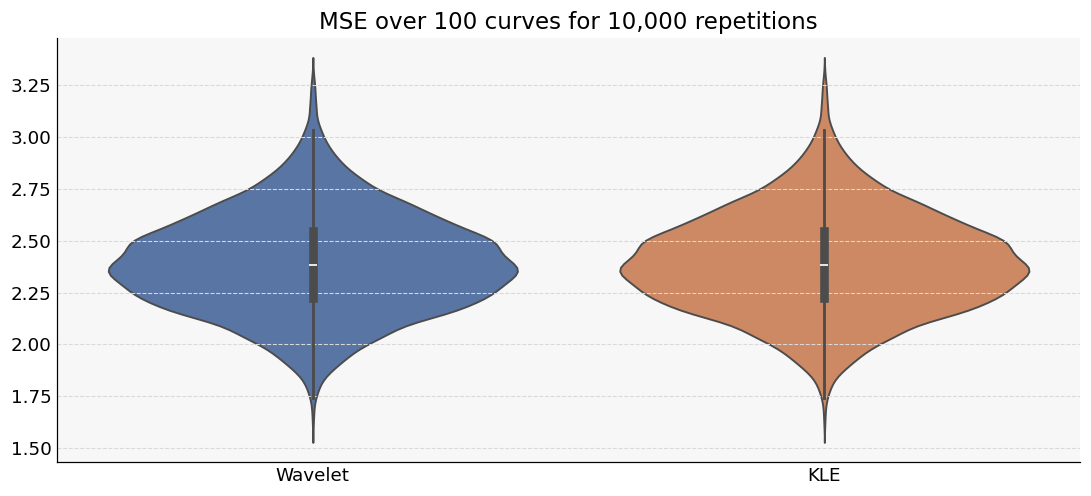

In [ ]:
df_mse = pd.DataFrame({"Wavelet": w_mse, "KLE": k_mse})

sns.violinplot(df_mse).set_title(f"MSE over {n} curves for {NR:,} repetitions")
plt.show()

In [55]:
df_mse.mean(axis=0)

Wavelet    2.393538
KLE        2.393587
dtype: float64

## Increasing variance

In [ ]:
NR = 10_000

# MSE
w_mse = []
k_mse = []
for nr in range(NR):
    if nr % 100 == 0:
        print(f"nr {nr}")
    
    # Parameters
    n = 100          # sample size (curves)
    d = 2            # dimension parameter
    nt = 256         # number of grid points
    u = np.linspace(0.01, 0.99, nt)[:, None]  # nt x 1 grid
    phis = [-0.775, 0.65, -0.525, 0.4] # AR(1) model coefficients
    variance = 1
    Y, X, mEps = simulate_curves(n,nt,u,phis, variances=np.full(len(phis), variance))

    ####### W-dFPC
    WdFPC_model = W_dFPC(Y)
    WdFPC_model.fit(
        nt=nt,
        N=N,
        wavelet=wavelet,
        p=p,
        d=dimensions)
    
    ####### W-dFPC
    KdFPC_model = K_dFPC(Y)
    KdFPC_model.fit(
        lag_max=lag_maximum,
        alpha=0.10,
        du=0.05,
        B=1000,
        p=5,
        m=nt,
        u=u,
        select_ncomp=False,
        dimension=dimensions
    )

    i_w_mse = []
    i_k_mse = []
    for i in range(Y.shape[1]):
        i_w_mse.append(mean_squared_error(Y[:, i], WdFPC_fitted[:,t]))
        i_k_mse.append(mean_squared_error(Y[:, i], KdFPC_fitted[:,t]))

    w_mse.append(np.mean(i_w_mse))
    k_mse.append(np.mean(i_k_mse))

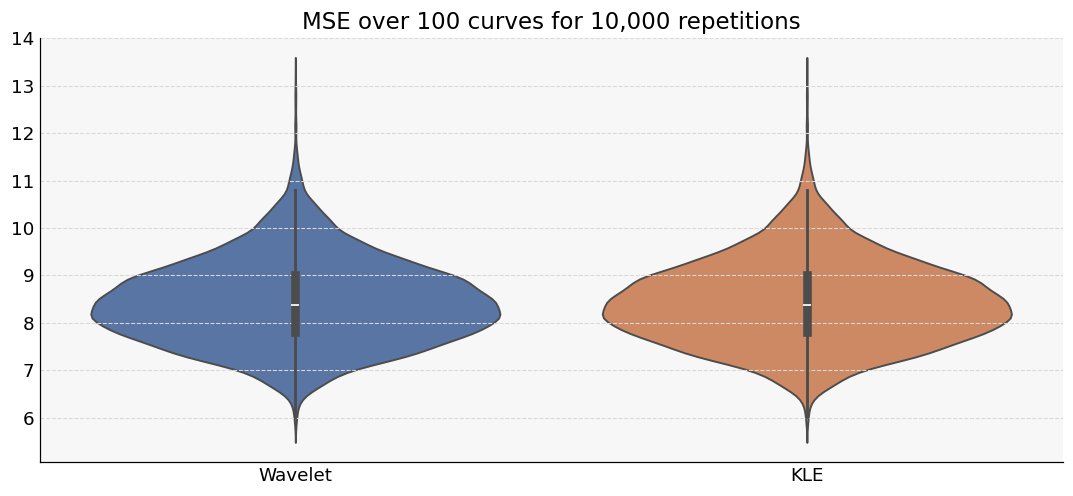

In [72]:
df_mse = pd.DataFrame({"Wavelet": w_mse, "KLE": k_mse})

sns.violinplot(df_mse).set_title(f"MSE over {n} curves for {NR:,} repetitions")
plt.show()

In [73]:
df_mse.mean(axis=0)

Wavelet    8.435952
KLE        8.435993
dtype: float64